Notebook to look at encoding models of A00c Activity; here we consider all A00c cells together (without regard for where manipulations were delivered or cell identity)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pickle

from janelia_core.stats.regression import grouped_linear_regression_boot_strap
from janelia_core.stats.regression import visualize_boot_strap_results

from keller_zlatic_vnc.linear_modeling import one_hot_from_table
from keller_zlatic_vnc.linear_modeling import color_grp_vars

## Load our data

In [3]:
data_dir = r'/Users/williambishop/Desktop'
data_file = 'A00c_activity.pkl'

# Behavior before and after consider
beh_before = ['Q', 'F', 'B']
beh_after = ['Q', 'F', 'B']

# How many boot strap samples we use in each analysis
n_bs_smps = 1000

# Determine how we will display results
font_size = 10
alpha = .01

In [4]:
data_path = Path(data_dir) / data_file
with open(data_path, 'rb') as f:
    data = pickle.load(f)
data = pd.DataFrame(data)

## Get groups of data (a group corresponds to each subject)

In [5]:
unique_ids = data['subject_id'].unique()
g = np.zeros(len(data))
for u_i, u_id in enumerate(unique_ids):
    g[data['subject_id'] == u_id] = u_i

## First, we look at linear models without accounting for subject identity of manipulation type

### Perform the regression and bootstrap computations

In [6]:
basic_enc_data, basic_enc_vars = one_hot_from_table(data, beh_before=beh_before, beh_after=beh_after,
                                        enc_subjects=False) 
basic_enc_vars.append('mean')

In [7]:
dff_before = data['dff_before']
dff_after = data['dff_after']

In [8]:
basic_dff_before_bs_results = grouped_linear_regression_boot_strap(x=basic_enc_data, 
                                                                  y=dff_before, g=g, 
                                                                  n_bs_smps=n_bs_smps, 
                                                                  include_mean=True)

In [9]:
basic_dff_after_bs_results = grouped_linear_regression_boot_strap(x=basic_enc_data, 
                                                                  y=dff_after, g=g, 
                                                                  n_bs_smps=n_bs_smps, 
                                                                  include_mean=True)

### Display results

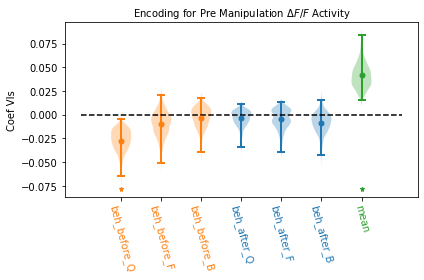

In [10]:
ax = visualize_boot_strap_results(bs_values=basic_dff_before_bs_results[0], 
                                  var_strs=basic_enc_vars, 
                                  theta = basic_dff_before_bs_results[1],
                                  var_clrs=color_grp_vars(basic_enc_vars),
                                  violin_plots=True,
                                  alpha=alpha)

ph = plt.ylabel('Coef Vls', fontsize=font_size)
ax.tick_params(axis="x", labelsize=font_size)
ax.tick_params(axis="y", labelsize=font_size)
plt.title('Encoding for Pre Manipulation $\Delta F /F$ Activity', fontsize=font_size)
plt.tight_layout()


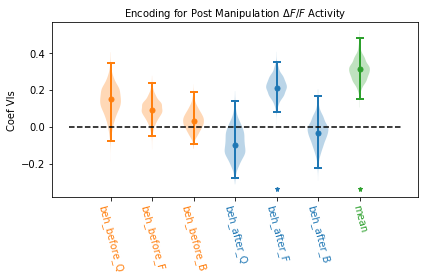

In [11]:
ax = visualize_boot_strap_results(bs_values=basic_dff_after_bs_results[0], 
                                  var_strs=basic_enc_vars, 
                                  theta = basic_dff_after_bs_results[1],
                                  var_clrs=color_grp_vars(basic_enc_vars),
                                  violin_plots=True,
                                  alpha=alpha)

ph = plt.ylabel('Coef Vls', fontsize=font_size)
ax.tick_params(axis="x", labelsize=font_size)
ax.tick_params(axis="y", labelsize=font_size)
plt.title('Encoding for Post Manipulation $\Delta F /F$ Activity', fontsize=font_size)
plt.tight_layout()